### Import videos and packages

In [96]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os
import sys
from pathlib import Path
from PIL import Image, ImageOps

# open source implementation of LBP
from skimage.feature import local_binary_pattern
from sklearn import preprocessing, metrics
from sklearn.svm import LinearSVC, SVC

import seaborn as sns

Run for each name

In [97]:
PYTHONPATH = sys.path[0]
PATHtrain = PYTHONPATH +'\\train'
PATHtest = PYTHONPATH +'\\test'
PATHtrain2 = PYTHONPATH +'\\trainImage'
PATHtest2 = PYTHONPATH +'\\testImage'


name = 'Nathan' ### Name of person who we are adding to train/test folders

## make folders for training and test data
script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'Current', 'Date')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'train')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'test')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'trainImage')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'testImage')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PATHtrain)
new_abs_path = os.path.join(script_path, name)
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PATHtest)
new_abs_path = os.path.join(script_path, name)
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PATHtrain2)
new_abs_path = os.path.join(script_path, name)
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PATHtest2)
new_abs_path = os.path.join(script_path, name)
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

In [73]:
PATHtrainNEW = PATHtrain2 + '\\' + name
PATHtestNEW = PATHtest2 + '\\' + name


vidcap = cv2.VideoCapture(name + '.mp4') ### mp4 file needs to be name.mp4 EXAMPLE kyle.mp4
success,image = vidcap.read()
count = 0;
print("I am in success")
while success:
    # Resize image
    scale_percent = 60 # percent of original size # was 30
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resize = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    # Write to folder
    if count%5 == 0:
        cv2.imwrite(os.path.join(PATHtestNEW,"frame%d.png") % count, resize)
    else:
        cv2.imwrite(os.path.join(PATHtrainNEW,"frame%d.png") % count, resize)
    success,image = vidcap.read()
    if cv2.waitKey(10) == 27:
        break
    count += 1
print(f'{name} Complete')

I am in success
Nathan Complete


Get just face now -- Rerun for each name

In [98]:
import sys
import os
import numpy as np

PYTHONPATH = sys.path[0]
PATHtrain = PYTHONPATH +'\\train'
PATHtest = PYTHONPATH +'\\test'
PATHtrain2 = PYTHONPATH +'\\trainImage'
PATHtest2 = PYTHONPATH +'\\testImage'

PATHtrainNEW = PATHtrain2 + '\\' + name
PATHtestNEW = PATHtest2 + '\\' + name

PYTHONPATH = sys.path[0]
PATHtrain = PYTHONPATH +'\\train'
PATHtest = PYTHONPATH +'\\test'

#name = 'Dallin'

PATHtestFace = PATHtest + '\\' + name
PATHtrainFace = PATHtrain + '\\' + name

PATHtrainNEW = PATHtrain2 + '\\' + name
PATHtestNEW = PATHtest2 + '\\' + name

For test data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import urllib.request
from PIL import Image

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        filename = 'face%d.png'%j
        plt.savefig(os.path.join(PATHtestFace,filename))
        #plt.show()

        
totalFrame = 500
for j in np.arange(0,totalFrame,5):
    try:
        img_png = Image.open(os.path.join(PATHtestNEW,'frame%d.png')%j)
        img_png.save(os.path.join(PATHtestNEW,'frame%d.jpg')%j)
        pixels = plt.imread(os.path.join(PATHtestNEW,'frame%d.jpg')%j)

        faceCascade = cv2.CascadeClassifier('cascade.xml')
        gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
                                             minNeighbors=2,\
                                             minSize=(30, 30))

        # display only the faces
        draw_faces(pixels, faces)            

        # display identified faces on original image
        fig, ax = plt.subplots(); ax.imshow(pixels)
        for (x, y, w, h) in faces:
            rect = patches.Rectangle((x, y), w, h, lw=2, \
                                     alpha=0.5, edgecolor='r', \
                                     facecolor='none')
            ax.add_patch(rect)

        #plt.show()
    except:
        print('done')
        break


For training data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import urllib.request
from PIL import Image

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        filename = 'face%d.png'%j
        plt.savefig(os.path.join(PATHtrainFace,filename))
        #plt.show()

        
totalFrame = 500
for j in np.arange(0,totalFrame):
    if j%5 != 0:
        try:
            img_png = Image.open(os.path.join(PATHtrainNEW,'frame%d.png')%j)
            img_png.save(os.path.join(PATHtrainNEW,'frame%d.jpg')%j)
            pixels = plt.imread(os.path.join(PATHtrainNEW,'frame%d.jpg')%j)

            faceCascade = cv2.CascadeClassifier('cascade.xml')
            gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
            faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
                                                 minNeighbors=2,\
                                                 minSize=(30, 30))

            # display only the faces
            draw_faces(pixels, faces)            

            # display identified faces on original image
            fig, ax = plt.subplots(); ax.imshow(pixels)
            for (x, y, w, h) in faces:
                rect = patches.Rectangle((x, y), w, h, lw=2, \
                                         alpha=0.5, edgecolor='r', \
                                         facecolor='none')
                ax.add_patch(rect)

            #plt.show()
        except:
            print('done')
            break

AT THIS POINT YOU WILL NEED TO LOOK AT DATA AND DELETE EXTRA PNG/JPG FILES AND TRAINING/TEST DATA THAT IS BAD

### classification

In [5]:
import os
import re
import cv2
import time
import shutil
import zipfile
import urllib.request
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
from random import randrange
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [67]:
# Initiate data processing tools
training_data_directory = 'train'
test_data_directory = 'test'

training_data_processor = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.2,
    rotation_range = 10,
    shear_range = 0.2,
    height_shift_range = 0.1,
    width_shift_range = 0.1
)

test_data_processor = ImageDataGenerator(rescale = 1./255)

# Load data into Python
training_data = training_data_processor.flow_from_directory(
    training_data_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
)

testing_data = test_data_processor.flow_from_directory(
    test_data_directory,
    target_size = (256 ,256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 956 images belonging to 6 classes.
Found 245 images belonging to 6 classes.


In [84]:
# choose model parameters
num_conv_layers = 3 # This was 3 but I chaned to 6. Could be incorrect
num_dense_layers = 1
layer_size = 32
num_training_epochs = 10
MODEL_NAME = 'Faces'

In [85]:
# Initiate model variable
model = Sequential()

# begin adding properties to model variable
# e.g. add a convolutional layer
model.add(Conv2D(layer_size, (3, 3), input_shape=(256,256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# add additional convolutional layers based on num_conv_layers
for _ in range(num_conv_layers-1):
    model.add(Conv2D(layer_size, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

# reduce dimensionality
model.add(Flatten())

# add fully connected "dense" layers if specified
for _ in range(num_dense_layers):
    model.add(Dense(layer_size))
    model.add(Activation('relu'))

# add output layer
model.add(Dense(6)) # Was 3 but definately needs to be 6
model.add(Activation('softmax'))

# compile the sequential model with all added properties
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'],
                )

# use the data already loaded previously to train/tune the model
model.fit(training_data,
            epochs=num_training_epochs,
            validation_data = testing_data)

# save the trained model
model.save(f'{MODEL_NAME}.h5')

Epoch 1/10
30/30 [==============================] - 49s 2s/step - loss: 1.6904 - accuracy: 0.3379 - val_loss: 1.3041 - val_accuracy: 0.5633
Epoch 2/10
30/30 [==============================] - 45s 1s/step - loss: 0.7784 - accuracy: 0.7123 - val_loss: 0.1530 - val_accuracy: 0.9796
Epoch 3/10
30/30 [==============================] - 45s 1s/step - loss: 0.1983 - accuracy: 0.9425 - val_loss: 0.0471 - val_accuracy: 0.9878
Epoch 4/10
30/30 [==============================] - 48s 2s/step - loss: 0.1098 - accuracy: 0.9655 - val_loss: 0.0161 - val_accuracy: 0.9959
Epoch 5/10
30/30 [==============================] - 47s 2s/step - loss: 0.0513 - accuracy: 0.9812 - val_loss: 0.0132 - val_accuracy: 0.9918
Epoch 6/10
30/30 [==============================] - 47s 2s/step - loss: 0.0398 - accuracy: 0.9927 - val_loss: 0.0095 - val_accuracy: 0.9918
Epoch 7/10
30/30 [==============================] - 44s 1s/step - loss: 0.0486 - accuracy: 0.9895 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 8/10
30/30 [==

## Check Accuracy

In [89]:
def make_prediction(image_fp):
    im = cv2.imread(image_fp) # load image
    #plt.imshow(im[:,:,[2,1,0]])
    img = image.load_img(image_fp, target_size = (256,256))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)
    
    class_ = ["Dallin", "Jason", "Josh",  "Kyle", "Logan","Nathan" ] # possible output values
    predicted_value = class_[model.predict(img_batch).argmax()]
    true_value = re.search(r'(Dallin)|(Nathan)|(Jason)|(Logan)|(Kyle)|(Josh)', image_fp)[0]
    
    out = f"""Predicted Face: {predicted_value}
    True Face: {true_value}
    Correct?: {predicted_value == true_value}"""
    
    return out

In [90]:
def make_predict(image_fp):
    im = cv2.imread(image_fp) # load image
    #plt.imshow(im[:,:,[2,1,0]])
    img = image.load_img(image_fp, target_size = (256,256))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)
    
    class_ = ["Dallin", "Jason", "Josh",  "Kyle", "Logan","Nathan" ] # possible output values
    predicted_value = class_[model.predict(img_batch).argmax()]
    #true_value = re.search(r'(Dallin)|(Nathan)|(Jason)|(Logan)|(Kyle)|(Josh)', image_fp)[0]
    
    out = f"""{predicted_value}"""
    
    return out

In [91]:
name = 'Kyle'
test_image_filepath = PATHtestFace = PATHtest + '\\' + name + '\\' + 'face45.png'
print(make_prediction(test_image_filepath))
print(make_predict(test_image_filepath))

Predicted Face: Kyle
    True Face: Kyle
    Correct?: True
Kyle


### Basic Code to run in class

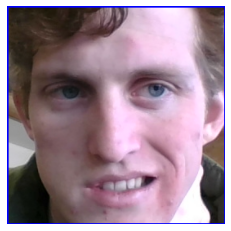

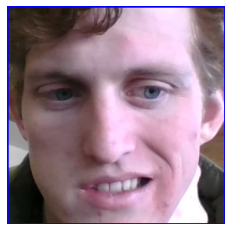

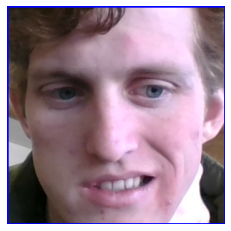

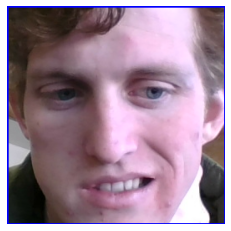

In [51]:
import cv2
import time
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import sys

PYTHONPATH = sys.path[0]
PATHcurrent = PYTHONPATH +'\\Current'+'\\Date'

present = []

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        #k = str(count) + str(i)
        #filename = 'face%s.png'%k

        filename = 'face%d.png'%i
        
        plt.savefig(os.path.join(PATHcurrent,filename))
        
        test_image_filepath = PATHcurrent + '\\' + filename
        ans = make_predict(test_image_filepath)
        
        if ans not in present:
            present.append(ans)
            
        #plt.show()
        time.sleep(1)

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

faceCascade = cv2.CascadeClassifier('cascade.xml')
video_capture = cv2.VideoCapture(0)

t = time.time()
count = 0
while time.time()-t <=5: # run for max 5 sec

    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
        minNeighbors=5,minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow('Video', frame)
    # Resize image
    scale_percent = 60 # percent of original size # was 30
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    resize = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    
    cv2.imwrite('image%d.png'%count,frame)
    
    
    pixels = plt.imread('image%d.png'%count)
    count+=1
    
    if len(faces) > 0:
        draw_faces(pixels,faces)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

 
video_capture.release()
cv2.destroyAllWindows()


## Full code to run in class

Kyle entered class at 11:41:41
Sent to logan.stewart.brown@gmail.com
Sent to jason.ishoy@gmail.com
Sent to hansen.nate98@gmail.com
Sent to 17jsweeten1@gmail.com
Sent to dlittlewood12@gmail.com


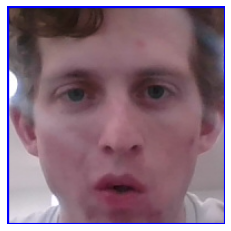

In [93]:
import cv2
import time
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import sys
import time
import pyttsx3

totalRunTime = 10 # seconds

PYTHONPATH = sys.path[0]
PATHcurrent = PYTHONPATH +'\\Current'+'\\Date'

present = []
ans = []

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        #k = str(count) + str(i)
        #filename = 'face%s.png'%k

        filename = 'face%d.png'%i
        
        plt.savefig(os.path.join(PATHcurrent,filename))
        
        test_image_filepath = PATHcurrent + '\\' + filename
        ans = make_predict(test_image_filepath)
        ans1 = [ans]
        
        
        if ans not in present:
            
            engine = pyttsx3.init()
            for i in ans1:
                if ans not in present:
                    engine.say("Welcome to class, "+i)
                    engine.runAndWait()
            present.append(ans)
            for k in range(len(ans1)):
                print(f'{ans1[k]} entered class at {time.strftime("%H:%M:%S")}')
            
        #plt.show()
        time.sleep(1)

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

faceCascade = cv2.CascadeClassifier('cascade.xml')
video_capture = cv2.VideoCapture(0)

t = time.time()
count = 0
while time.time()-t <=totalRunTime: # run for max 5 sec

    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
        minNeighbors=5,minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow('Video', frame)
    # Resize image
    scale_percent = 60 # percent of original size # was 30
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    resize = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    
    cv2.imwrite('image%d.png'%count,frame)
    
    
    pixels = plt.imread('image%d.png'%count)
    count+=1
    
    if len(faces) > 0:
        draw_faces(pixels,faces)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

 
video_capture.release()
cv2.destroyAllWindows()
    
    
    
### Email


import pandas as pd
import numpy as np
import smtplib
from email.mime.text import MIMEText
from getpass import getpass


From ='Instructor <instructor@example.com>'
username ='my_username'
smtp_server ='mail.et.byu.edu'
password = '1234'

students = pd.DataFrame({'First': ['Logan', 'Jason', 'Nathan', 'Josh', 'Kyle', 'Dallin'],
                         'Email': ['logan.stewart.brown@gmail.com', 'jason.ishoy@gmail.com', 'hansen.nate98@gmail.com',
                                   '17jsweeten1@gmail.com', 'kmanwaring32@gmail.com', 'dlittlewood12@gmail.com']})

def sendEmail(Subject, bodyText, To, pw):
    msg = MIMEText(bodyText)
    msg['Subject'] = Subject
    msg['From']    = From
    msg['To']      = To
    #server = smtplib.SMTP(smtp_server)
    #server.starttls()
    #server.login(username, password)
    #server.send_message(msg)
    #server.quit()

    print('Sent to ' + To)

Message = '''We missed you in class today. We hope you are doing well.

Today we worked on the project for facial recognition.

Best regards,

Group 4
Brigham Young University'''


for i in present:
    students = students[(students['First']) != i]

students = students.reset_index(drop=True)

for i in range(len(students)):
    
    if students.empty == True:
        print('No absent students')
    
    else:
        bdTxt = students.First[i] + ',\n\n' + Message

        To = students.Email[i]
        Subject = "Hi " + students.First[i] + ", we missed you today"
        sendEmail(Subject,bdTxt,To,password)

In [2]:
video_capture.release()
cv2.destroyAllWindows()